In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from scipy import stats

In [3]:
df=pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
def cleanIncome(x):
    if isinstance(x,str):
        return float (x[1:].replace(",",''))

In [5]:
df[" Income "]=df[" Income "].map(lambda x:cleanIncome(x))

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
q95=df["MntWines"].quantile(0.95)
q01=df["MntWines"].quantile(0.01)
greater_q95_cond=(df["MntWines"]>q95)
lower_q01_cond=(df["MntWines"]<q01)

In [8]:
df=df[~(greater_q95_cond|lower_q01_cond)]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2116 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2116 non-null   int64  
 1   Year_Birth           2116 non-null   int64  
 2   Education            2116 non-null   object 
 3   Marital_Status       2116 non-null   object 
 4    Income              2092 non-null   float64
 5   Kidhome              2116 non-null   int64  
 6   Teenhome             2116 non-null   int64  
 7   Dt_Customer          2116 non-null   object 
 8   Recency              2116 non-null   int64  
 9   MntWines             2116 non-null   int64  
 10  MntFruits            2116 non-null   int64  
 11  MntMeatProducts      2116 non-null   int64  
 12  MntFishProducts      2116 non-null   int64  
 13  MntSweetProducts     2116 non-null   int64  
 14  MntGoldProds         2116 non-null   int64  
 15  NumDealsPurchases    2116 non-null   int64 

In [10]:
df=df.fillna(0)

<Axes: title={'center': 'MntWines'}, xlabel='Education'>

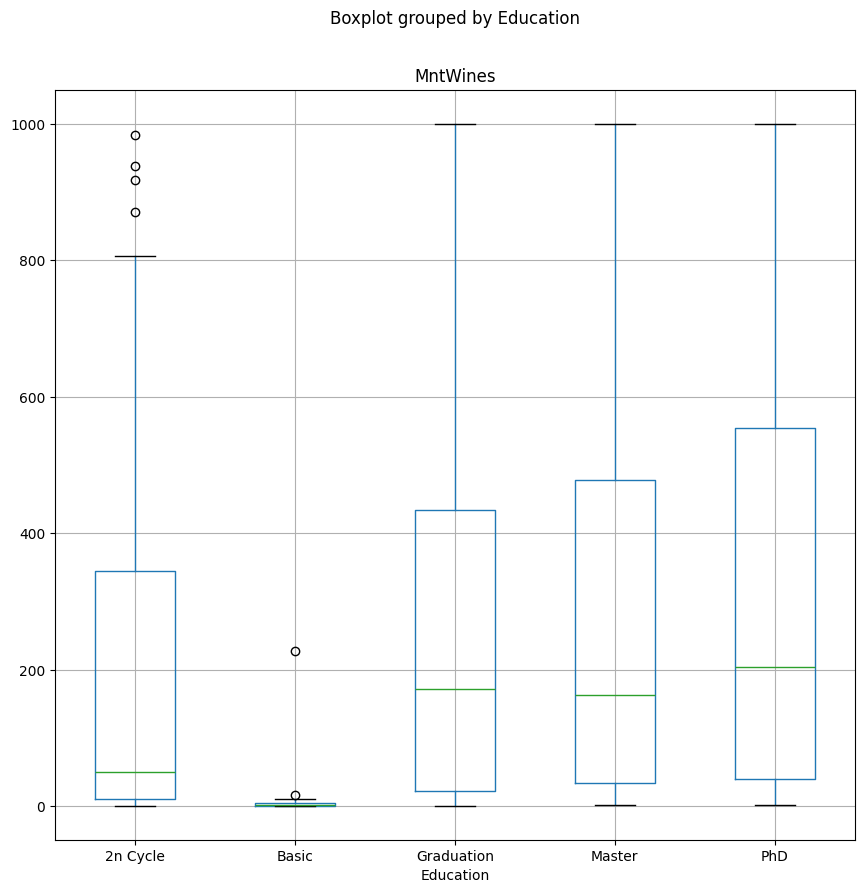

In [11]:
df.boxplot(by="Education",column="MntWines",figsize=(10,10))

In [12]:
#Humlog 2nCycle  & basic wale ko aisehi ignore kardenge qki uska mean bahut dur hai while the graduation Eduxation,Master,phD ka mean nazdik hai


In [13]:
df.Education.value_counts()

Education
Graduation    1088
PhD            437
Master         346
2n Cycle       197
Basic           48
Name: count, dtype: int64

In [14]:
#We will take a sample of 200 from each of this group
#200 is smaller if you want to go with that way to compute power & then calculate suitable size
#as i assume that 200 is good sample size to be select & evaluate

In [15]:
grad=df[df["Education"]=="Graduation"]["MntWines"].sample(n=200)

In [16]:
grad=grad.reset_index(drop=True)

In [17]:
grad.mean()

247.545

In [18]:
phd=df[df["Education"]=="PhD"]["MntWines"].sample(n=200)

In [19]:
phd=phd.reset_index(drop=True)

In [20]:
phd.mean()

311.865

In [21]:
master=df[df["Education"]=="Master"]["MntWines"].sample(n=200)

In [22]:
master=master.reset_index(drop=True)

In [23]:
master.mean()

260.575

In [24]:
#Now checking gf the data is fllowing nomral distribution or not

C:\Users\Srija\AppData\Local\Temp\ipykernel_12532\1768462792.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grad,bins=25)


<Axes: xlabel='MntWines', ylabel='Density'>

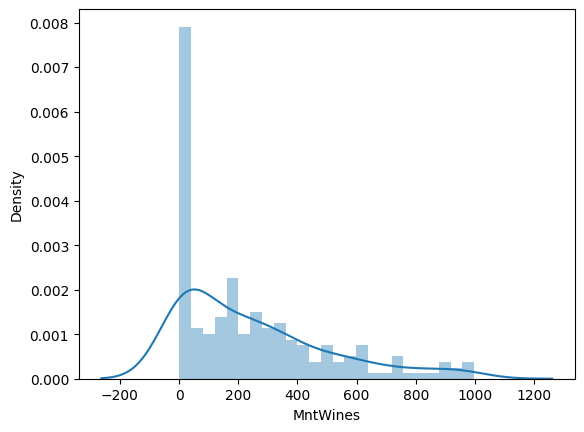

In [25]:
sns.distplot(grad,bins=25)

In [26]:
#It is very highly skewed distribution ye normal distribution nahi hai
#Lets run a normlaity test on it to if these

## Normality Test
# Checking whether our dataset is following Normal distribution or not

In [27]:
stats.normaltest(grad)

NormaltestResult(statistic=34.13988127888017, pvalue=3.86028148546017e-08)

In [28]:
#Since p value is -ve so we reject Null hypothesis

In [29]:
#Another way is by using qq plot

In [30]:
!pip install statsmodels

In [31]:
import statsmodels.api as sm

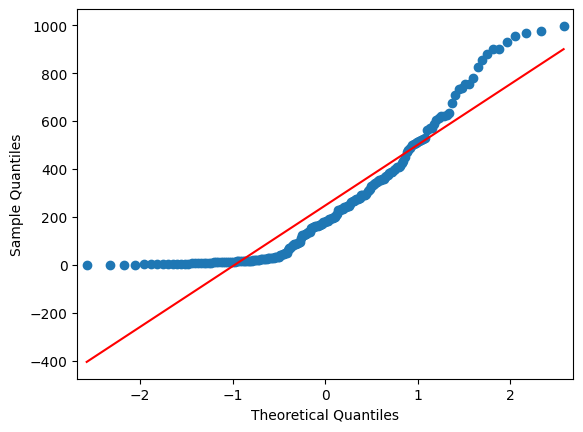

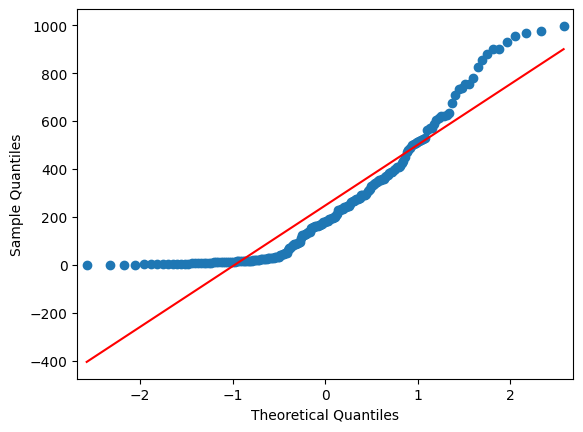

In [32]:
sm.qqplot(grad,line="s")

In [33]:
grad_samp=[]

for i in range(500):
    grad=df[df["Education"]=='Graduation']["MntWines"].sample(n=200)
    ar=grad.mean()
    grad_samp.append(ar)

In [34]:
#Now lets see this ssampling sirtibution follows normal distribtion or not

C:\Users\Srija\AppData\Local\Temp\ipykernel_12532\3120987231.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grad_samp,bins=25)


<Axes: ylabel='Density'>

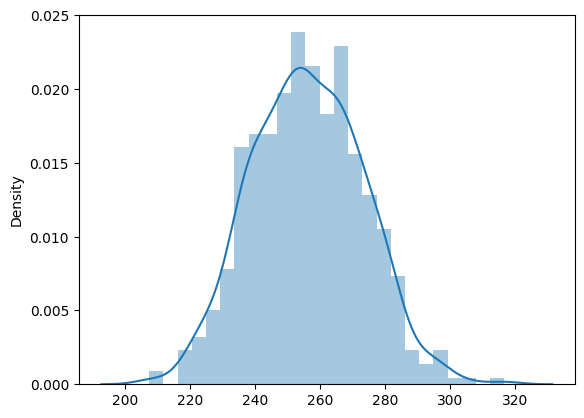

In [35]:
sns.distplot(grad_samp,bins=25)

In [36]:
np.mean(grad_samp)

256.09443

In [37]:
 ##One Way ANOVA YAha se chalu horaha hain


In [38]:
d={'Grad':grad,'PhD':phd,'Master':master}

In [39]:
dataset=pd.DataFrame(d)

In [40]:
dataset

,Grad,PhD,Master
0,NaN,20.0,112.0
1,464.0,52.0,721.0
2,NaN,14.0,519.0
3,10.0,680.0,547.0
4,NaN,22.0,275.0
...,...,...,...
2160,14.0,NaN,NaN
2184,136.0,NaN,NaN
2193,11.0,NaN,NaN
2199,138.0,NaN,NaN


In [41]:
f,pval=stats.f_oneway(dataset['Grad'],dataset['PhD'],dataset['Master'])

In [42]:
f

nan

In [43]:
pval
#It is greate than 0.05 so we can't reject null hypothesis

nan

In [44]:
stats.skew(grad)

1.045303295608816

In [45]:
df2=df[~(df[" Income "]>120000)]

In [46]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


<Axes: xlabel=' Income ', ylabel='MntWines'>

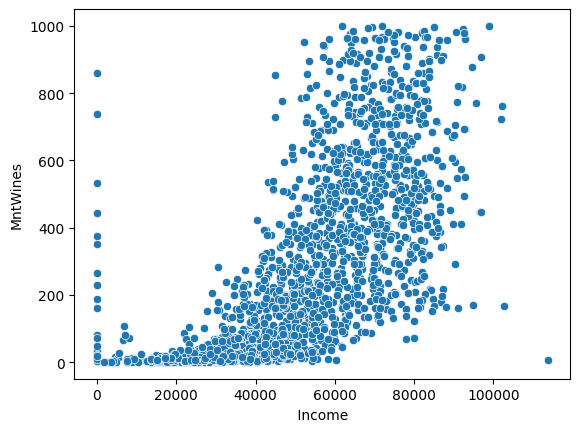

In [47]:
sns.scatterplot(x=df2[' Income '], y=df2['MntWines'])

In [48]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [49]:
cols=[ ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

In [50]:
df3=df2[cols]

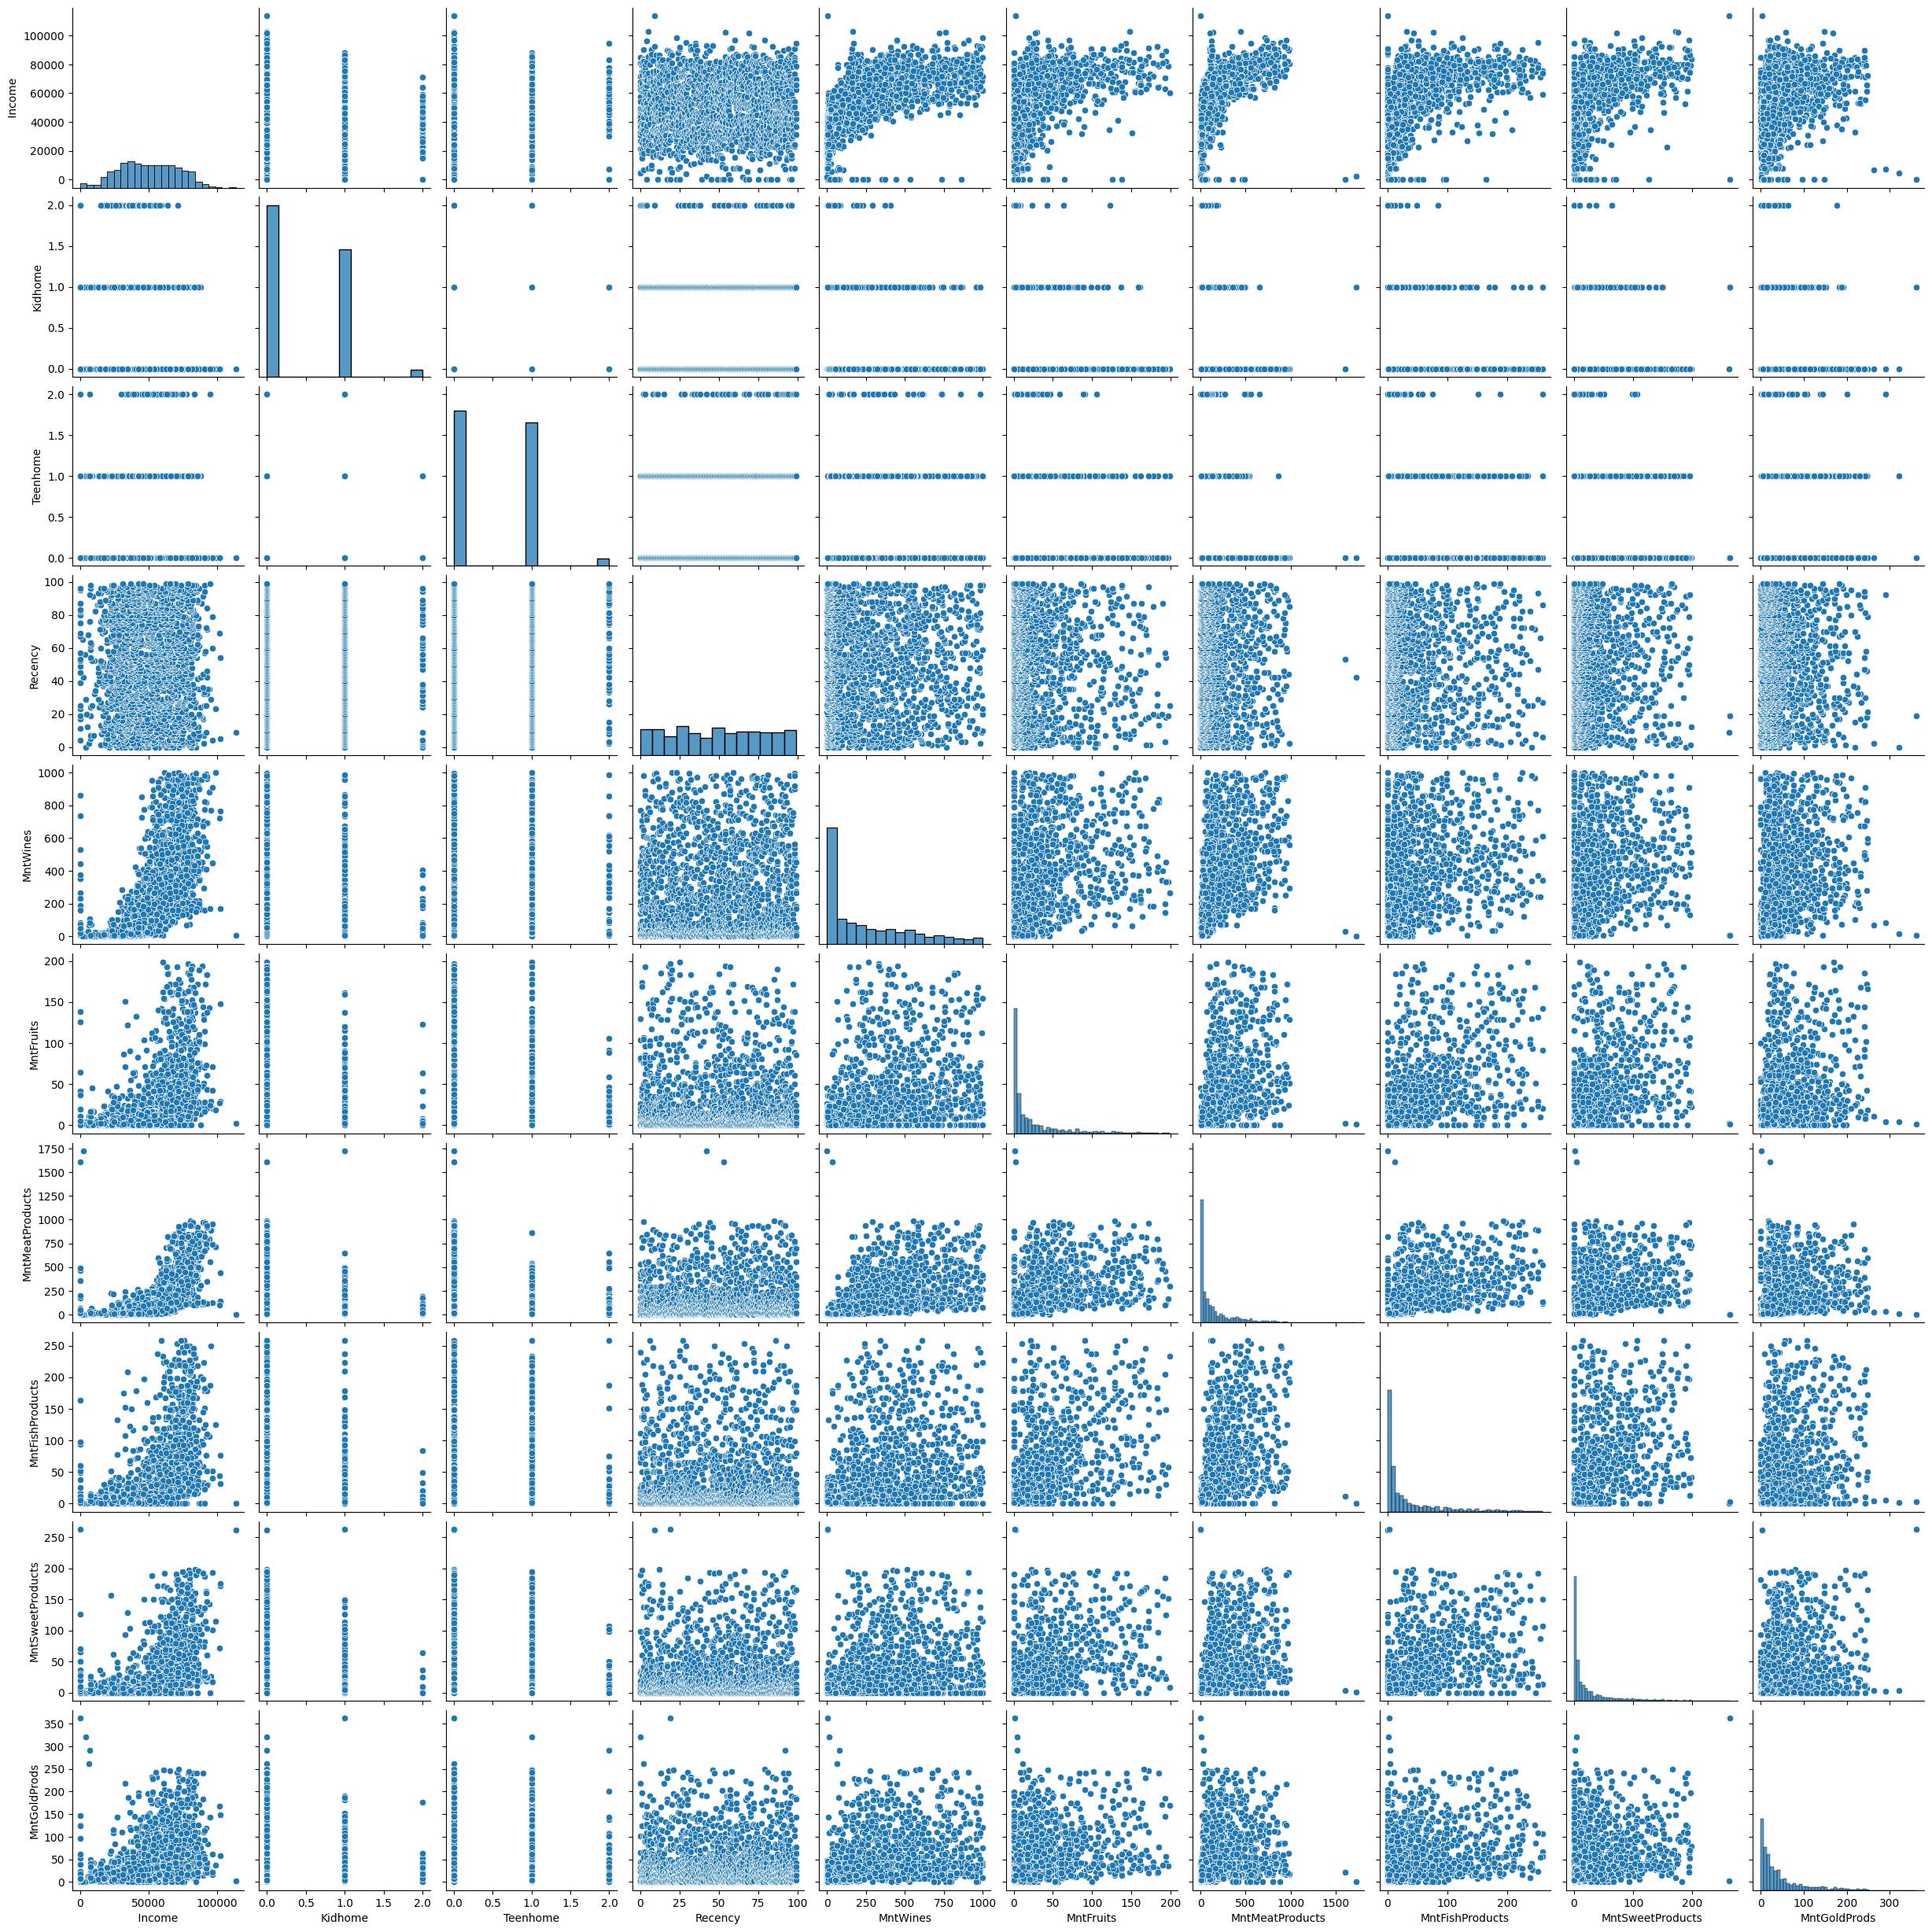

In [51]:
sns.pairplot(df3)

In [53]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(df3.corr(), cmap='YlGnBu', annot=True)

ValueError: could not convert string to float: '6/16/14'

In [55]:
print(df3.dtypes)

 Income             float64
Kidhome               int64
Teenhome              int64
Dt_Customer          object
Recency               int64
MntWines              int64
MntFruits             int64
MntMeatProducts       int64
MntFishProducts       int64
MntSweetProducts      int64
MntGoldProds          int64
dtype: object


In [56]:
df3.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,84835.0,0,0,6/16/14,0,189,104,379,111,189,218
1,57091.0,0,0,6/15/14,0,464,5,64,7,0,37
2,67267.0,0,1,5/13/14,0,134,11,59,15,2,30
3,32474.0,1,1,5/11/14,0,10,0,1,0,0,0
4,21474.0,1,0,4/8/14,0,6,16,24,11,0,34


In [58]:
df3['Dt_Customer'] = pd.to_datetime(df3['Dt_Customer'], errors='coerce')


C:\Users\Srija\AppData\Local\Temp\ipykernel_12532\368271495.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['Dt_Customer'] = pd.to_datetime(df3['Dt_Customer'], errors='coerce')
C:\Users\Srija\AppData\Local\Temp\ipykernel_12532\368271495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Dt_Customer'] = pd.to_datetime(df3['Dt_Customer'], errors='coerce')


In [60]:
df3['Dt_Customer'] = pd.to_datetime(df3['Dt_Customer'], format='%m/%d/%y', errors='coerce')


C:\Users\Srija\AppData\Local\Temp\ipykernel_12532\1394857568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Dt_Customer'] = pd.to_datetime(df3['Dt_Customer'], format='%m/%d/%y', errors='coerce')


In [61]:
df3 = df3.drop(columns=['Dt_Customer'], inplace=False)

In [62]:
df3.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,84835.0,0,0,0,189,104,379,111,189,218
1,57091.0,0,0,0,464,5,64,7,0,37
2,67267.0,0,1,0,134,11,59,15,2,30
3,32474.0,1,1,0,10,0,1,0,0,0
4,21474.0,1,0,0,6,16,24,11,0,34


<Axes: >

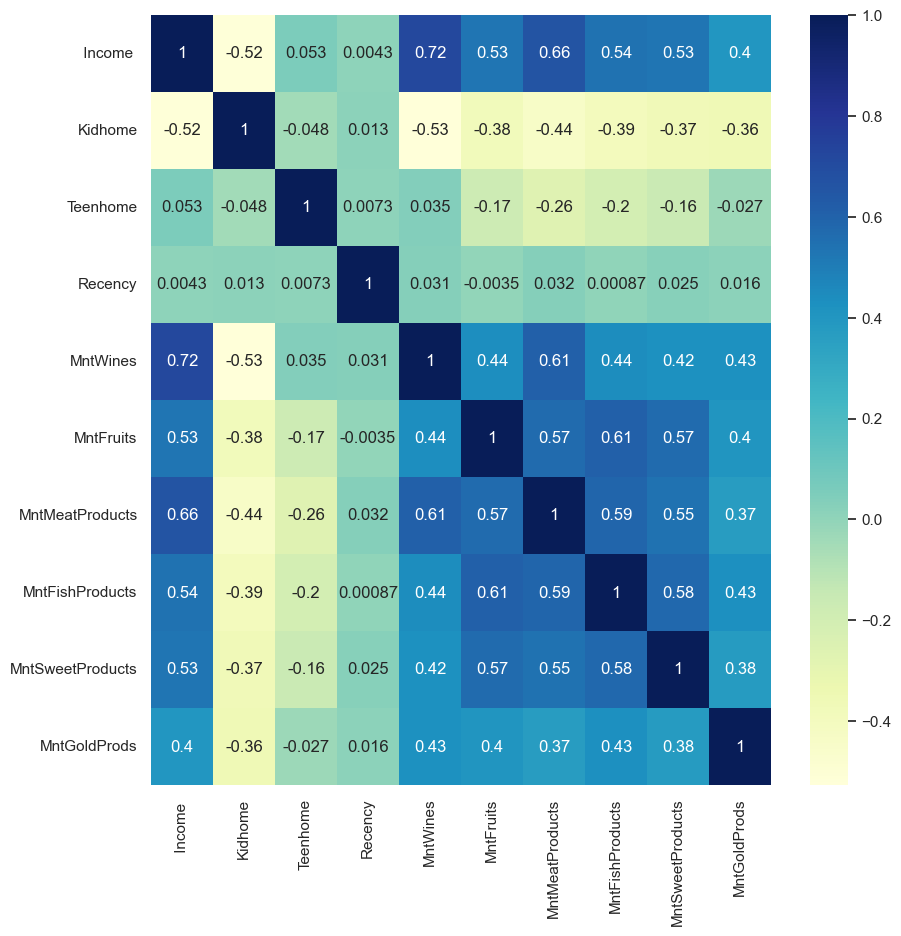

In [63]:
sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(df3.corr(), cmap='YlGnBu', annot=True)

In [64]:
np.cov(df3[" Income "],df3["MntWines"])

array([[4.31317648e+08, 4.13833347e+06],
       [4.13833347e+06, 7.67636348e+04]])

In [65]:
np.corrcoef(df3[" Income "],df3["MntWines"])

array([[1.        , 0.71919905],
       [0.71919905, 1.        ]])